<a href="https://colab.research.google.com/github/igoradriano/1-Linear-Regression/blob/main/Simple_Linear_Regression_Salary_Dataset__statsmodels__Kaggle_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression - Red Wine Quality

## Installing Relevant Packages

In [15]:
!pip install -q kaggle

## Imports

Importing relevant packages and data


In [16]:
import pandas as pd
import seaborn as sns
import shutil
import os
from google.colab import drive

In [17]:
def load_kaggle_key(source_file, destination_dir):
  # Mount your Google Drive to the Colab environment
  # - force_remount=True ensures Drive is remounted even if already mounted
  drive.mount('/content/gdrive', force_remount=True)

  # Specify the path to the file you want to copy
  source_file = source_file

  # Specify the destination directory where you want to copy the file
  destination_dir = destination_dir

  # Use the shutil module to copy the file from source to destination
  shutil.copy(source_file, destination_dir)


In [18]:
load_kaggle_key('/content/gdrive/MyDrive/DATA_SCIENCE/kaggle_API_key/kaggle.json', ".")

Mounted at /content/gdrive


In [19]:
def load_data(api_command):

  # Split the string into parts using the delimiter "-d"
  k_directory = api_command.split("-d ")

  # Get the second part, which contains the desired string
  kgg_directory = k_directory[1].strip()  # Remove whitespace at the beginning and end

  # Split the string by the last "/" to extract the dataset name
  k_file = kgg_directory.split("/")[-1]

  # Create a directory called kaggle
  # - The ~/.kaggle directory is the default directory for Kaggle files
  !mkdir ~/.kaggle

  # Copy the kaggle.json file to the kaggle directory
  !cp kaggle.json ~/.kaggle/

  # Change the permissions of the file
  # - The 600 parameter means that the file can only be read and written by the owner
  !chmod 600 ~/.kaggle/kaggle.json

  # Download the dataset
  # - The -d parameter specifies the name of the dataset
  !kaggle datasets download -d {kgg_directory}

  # Unzip the dataset
  !unzip {k_file}.zip


In [20]:
load_data("!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression")

mkdir: cannot create directory ‘/root/.kaggle’: File exists
salary-dataset-simple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  salary-dataset-simple-linear-regression.zip
replace Salary_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Salary_dataset.csv      


In [21]:
# Obter uma lista de todos os arquivos na pasta raiz
files = os.listdir(".")

for file in files:
  if file.endswith('csv'):
    df = pd.read_csv(file)
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


## Data Cleaning

In [22]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [26]:
df.rename(columns={"YearsExperience": "years_exp", "Salary": "salary"}, inplace=True)
df.head()

,years_exp,salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


## Exploratory data analysis

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   years_exp  30 non-null     float64
 1   salary     30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [28]:
df.describe()

,years_exp,salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Since this example focuses on simple linear regression, you want to check for any linear relationships among variables in the dataframe. You can do this by creating scatterplots using any data visualization package, for example matplotlib.plt, seaborn, or plotly.

To visualize more than one relationship at the same time, we use the pairplot() function from the seaborn package to create a scatterplot matrix.

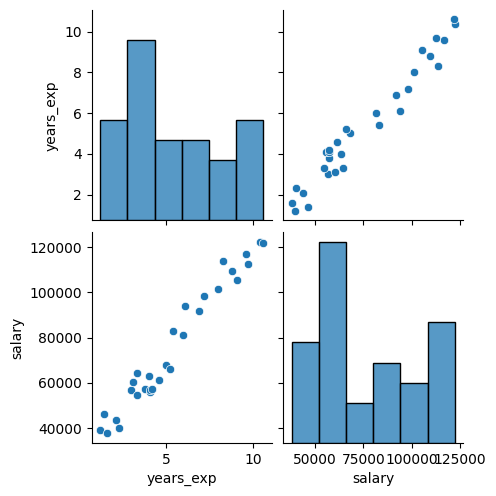

In [29]:
# Create pairwise scatterplots of data set
sns.pairplot(df)

## Model construction



In [30]:
# Subset Data (citric acid and fixed acidity)
ols_data = df[["years_exp", "salary"]]

Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the `~`, and the x or independent variables comes after the `~`.

In [31]:
# Write out formula
ols_formula = "salary ~ years_exp"

Lastly, you can build the simple linear regression model in `statsmodels` using the `ols()` function. You can import the `ols()` function directly using the line of code below.

In [32]:
# Import ols function
from statsmodels.formula.api import ols

Then, you can plug in the `ols_formula` and `ols_data` as arguments in the `ols()` function. After you save the results as a variable, you can call on the `fit()` function to actually fit the model to the data.

In [33]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

Lastly, you can call the `summary()` function on the `model` object to get the coefficients and more statistics about the model. The output from `model.summary()` can be used to evaluate the model and interpret the results.

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        11:10:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
years_exp   9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$salary = 24850 + 9449,9623 \cdot \text{year_exp }$

You can use the `regplot()` function from `seaborn` to visualize the regression line.

<Axes: xlabel='years_exp', ylabel='salary'>

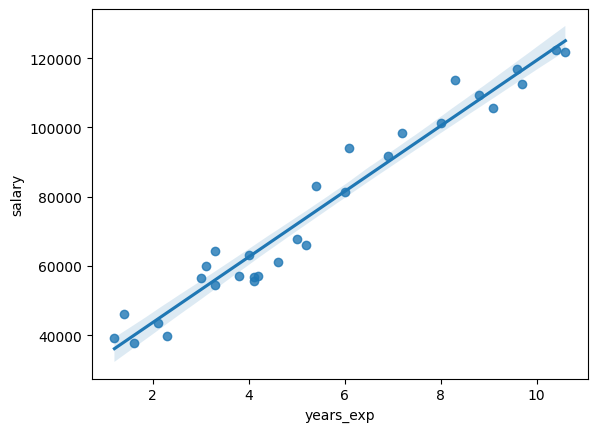

In [35]:
sns.regplot(x = "years_exp", y = "salary", data = ols_data)

## Finish checking model assumptions

There are four main model assumptions for simple linear regression, in no particular order:
1. Linearity
2. Normality
3. Independent observations
4. Homoscedasticity

You already checked the linearity assumption by creating the scatterplot matrix. The independent observations assumption is more about data collection. There is no reason to believe that the year of experience or salary of each individual would be related to any other individual. So we can check off assumptions 1 and 3.

The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, you can only check these assumptions after you have constructed the model. To check these assumptions, you will check the residuals, as an approximation of the errors.

To more easily check the model assumptions and create relevant visualizations, you can first subset the X variable by isolating just the `years_exp` column. Additionally, you can save the predicted values from the model using the `model.predict(X)` function.

In [36]:
# Subset X variable
X = ols_data["years_exp"]

# Get predictions from model
fitted_values = model.predict(X)

Then, you can save the model residuals as a variable by using the `model.resid` attribute.

In [37]:
# Calculate residuals
residuals = model.resid

### Check the normality assumption

To check the normality assumption, you can create a histogram of the residuals using the `histplot()` function from the `seaborn` package.

From the below histogram, you may notice that the residuals are almost normally distributed. In this case, it is likely close enough that the assumption is met.

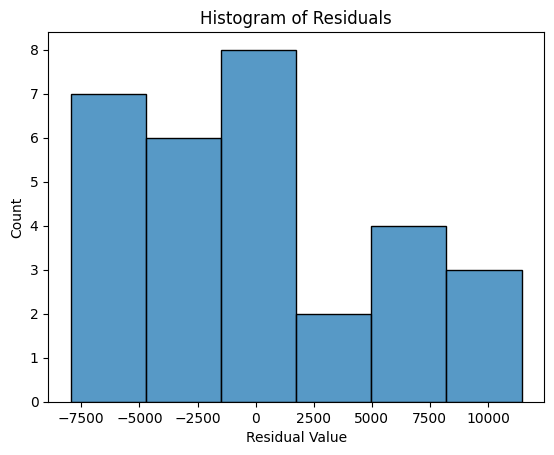

In [38]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. Recall that if the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. You can create a Q-Q plot by using the `qqplot` function from the `statsmodels.api` package.

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of the distribution.

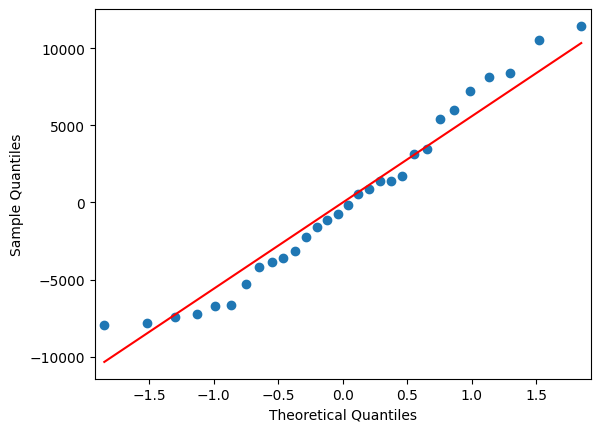

In [41]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

### Check the homoscedasticity assumption

Lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, you can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

You can create one scatterplot by using the `scatterplot()` function from the `seaborn` package. The first argument is the variable that goes on the x-axis. The second argument is the variable that goes on the y-axis.

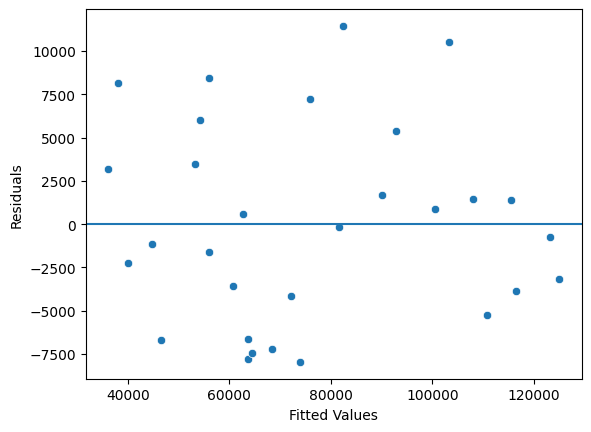

In [42]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

### **Interpret the plot:**
If the points in the plot are randomly distributed around the line y=0, homoscedasticity is satisfied.

If the points in the plot are clustering around a diagonal line, homoscedasticity is not satisfied.

In the above example, the points in the plot are randomly distributed around the line y=0, therefore homoscedasticity is satisfied.





*Here are some tips for interpreting a scatter plot of residuals by predicted values:*

Use a logarithmic scale for the x and y axes. This can help to reveal patterns that are not visible on a linear scale.

Consider the sample size. It is more difficult to detect lack of homoscedasticity in small samples.

Compare the plot with other models. If homoscedasticity is not satisfied for one model, it may also not be satisfied for other models with similar parameters.